In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target


In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

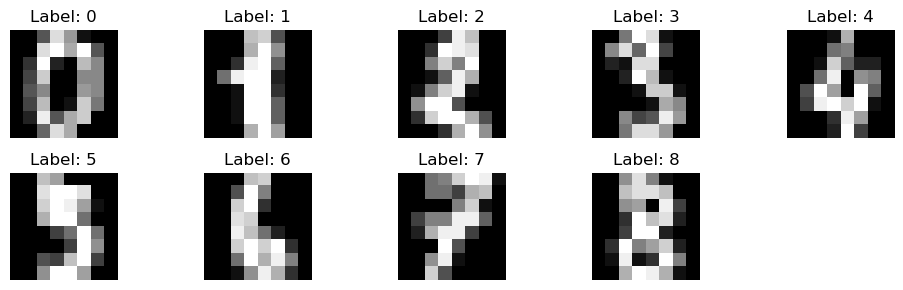

In [11]:
plt.figure(figsize=(10, 3))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
data_new = pd.DataFrame(X,columns = digits.feature_names)

In [15]:
data_new.shape

(1797, 64)

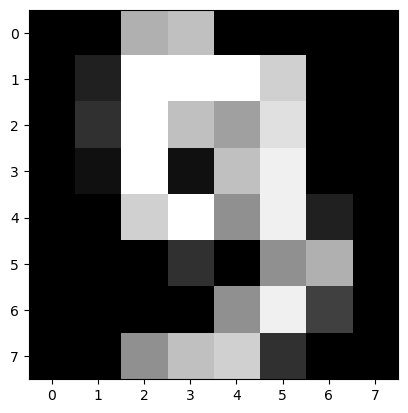

In [16]:
plt.imshow(data_new.loc[9].values.reshape(8, 8), cmap='gray')


In [17]:
data_new.sample(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1158,0.0,0.0,0.0,5.0,15.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,15.0,13.0,1.0,0.0
521,0.0,0.0,9.0,14.0,16.0,13.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,16.0,9.0,0.0,0.0,0.0
444,0.0,0.0,0.0,11.0,12.0,1.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,1.0,10.0,14.0,10.0,2.0,0.0
1756,0.0,0.0,10.0,15.0,15.0,11.0,4.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,6.0,11.0,16.0,8.0,0.0,0.0
37,0.0,0.0,13.0,10.0,1.0,0.0,0.0,0.0,0.0,5.0,...,14.0,0.0,0.0,0.0,13.0,13.0,15.0,16.0,13.0,0.0
802,0.0,0.0,0.0,11.0,13.0,5.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,10.0,16.0,11.0,1.0,0.0
1178,0.0,0.0,0.0,8.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,13.0,2.0,0.0,0.0
606,0.0,0.0,2.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,...,16.0,5.0,0.0,0.0,3.0,15.0,16.0,15.0,7.0,1.0
1016,0.0,0.0,9.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,9.0,15.0,12.0,16.0,16.0,9.0
1147,0.0,0.0,1.0,10.0,16.0,13.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,14.0,15.0,3.0,0.0,0.0


In [18]:
data_new['target'] = digits.target

In [19]:
data_new.shape

(1797, 65)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_new.drop(columns = ['target']), data_new['target'], test_size=0.3, random_state=4)


In [21]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    multi_class='multinomial',
    max_iter=10000
)
log_model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=10000, multi_class='multinomial')

In [22]:
y_pred = log_model.predict(X_test)

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.89      0.98      0.93        51
           2       0.98      1.00      0.99        54
           3       0.98      0.93      0.95        55
           4       0.98      0.98      0.98        54
           5       0.95      0.97      0.96        58
           6       1.00      0.96      0.98        52
           7       1.00      0.95      0.97        55
           8       0.96      0.95      0.95        55
           9       0.93      0.96      0.94        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



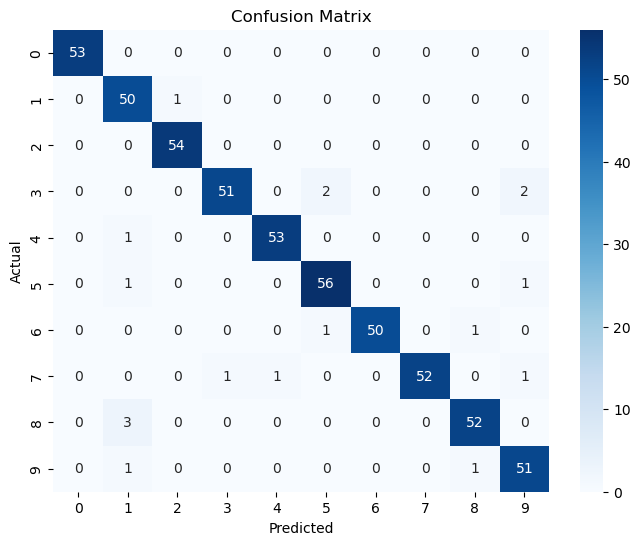

In [90]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
X_test.index

Index([ 492, 1761,  276,  618,  354, 1172,  428,  431, 1626, 1455,
       ...
       1389, 1424,  708,  227,  645, 1379, 1178,  420, 1037,  521],
      dtype='int64', length=540)

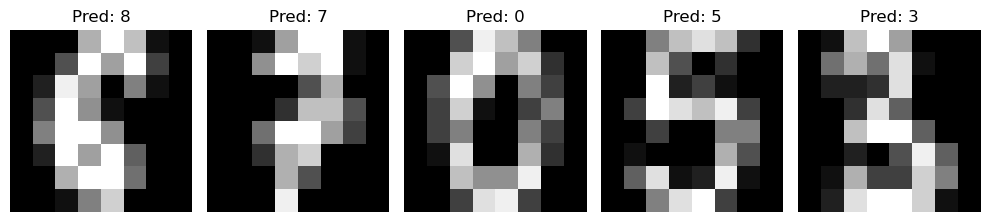

In [29]:
# Show 5 test images with predictions
plt.figure(figsize=(10, 3))
li = [0,1,2,3,4,5]
for i,j in zip(X_test.index[:5],li):
    plt.subplot(1, 5, j+1)
    plt.imshow(X_test.loc[i].values.reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[j]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
aaa